<h1>Introduction</h1>

Although this assignmet requires performing specific step such as <u>feature engineering</u> I would emphasize last efforts in development of deep learning model and I reference some useful papers.


At very start , I would referencing some useful survey papers considering topic of interest [<a href="https://arxiv.org/pdf/2008.00364.pdf">Paper 1</a>], [<a href="https://arxiv.org/pdf/1904.08067.pdf">Paper 2</a>]. Before going to data cleaning, feature extraction and feature engineering let's dive deeper in some important questions.

Because of the assignent requirements I will use classical methods, but it is important for further research and real practice to cosider possibilities of state-of-the-art approaches which includes deep learning. 

Firstly, let's make a taxonomy to be able distinguish these approaches.

There are two main direction of approaches:
<ul>
    <li>Shallow Learning</li>
    <li>Deep Learning</li>
</ul>


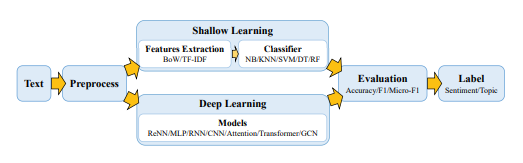
    
<!--  Image source: https://arxiv.org/pdf/2008.00364.pdf    -->


As depicted, <b>shallow learning</b> has two components:
<ul>
    <li>Feature extraction</li>
    <li>Classifier</li>
</ul>

For feature extraction we can use different methods, as follow:

<ul>
    <li>Bag of Words (BoW)</li>
    <li>Term Frequency-Inverse Document Frequency (TF-IDF)</li>
    <li>Word2Vec</li>
    <li>GloVe</li>
</ul>

><h3>NOTE!</h3>
Except scientific literature, there are different useful popular resources to get more information about <b>feature engineering techniques</b>, as follow:
    <p>- <a href="https://www.analyticsvidhya.com/blog/2021/07/feature-extraction-and-embeddings-in-nlp-a-beginners-guide-to-understand-natural-language-processing/">medium.com</a>
    <p>- <a href="https://www.analyticsvidhya.com/blog/2021/07/feature-extraction-and-embeddings-in-nlp-a-beginners-guide-to-understand-natural-language-processing/">analyticsvidhya.com</a>
        

        
There are different shallow learning-based text classification models, as follow:
<ul>
    <li>Naive Bayes (NB)</li>
    <li>K-Nearest Neighbor (KNN)</li>
    <li>Support Vector Machine (SVM)</li>
    <li>Decision Trees (DT)</li>
    <li>Random Forest (RF)</li>
</ul>        

><h3>CITED:</h3>
<i>From the 1960s until the 2010s, shallow learning-based text classification models dominated. Shallow learning means
statistics-based models, such as Na¨ıve Bayes (NB), Knearest neighbor (KNN), and support vector machine (SVM). Comparing with the earlier rule-based methods, this method has obvious advantages in accuracy and stability. However, these approaches still need to do feature engineering, which is time-consuming and costly. Besides, they usually disregard the natural sequential structure or contextual information in textual data, making it challenging to learn the semantic information of the words. Since the 2010s, text classification has gradually changed from shallow learning models to deep learning models. Compared with the methods based on shallow learning, <b>deep learning methods avoid designing rules and features by humans and automatically provide semantically meaningful representations</b> for text mining. Therefore, most of the text classification research works are based on DNNs, which are data-driven approaches with high computational complexity. [<a href="https://arxiv.org/pdf/2008.00364.pdf">Paper 1</a>]</i>

At the end of this part I would to cite very useful discussion about <b>evaluation metrics</b> presented in mentioned paper [<a href="https://arxiv.org/pdf/2008.00364.pdf">Paper 1</a>].

><h3>CITED:</h3>
<i>In terms of <b>evaluating</b> text classification models, <b>accuracy and F1 score are the most used</b> to assess the text classification
methods. Later, with the increasing difficulty of classification tasks or the existence of some particular tasks, the evaluation metrics are improved. For example, evaluation metrics such as <b>P@K</b> and <b>Micro-F1</b> are used to <b>evaluate multi-label text classification performance</b>, and Mean Reciprocal Rank (MRR) is usually used to estimate the performance of QA tasks. [<a href="https://arxiv.org/pdf/1904.08067.pdf">Paper 2</a>]</i>

Thanks to the mentioned survey paper [<a href="https://arxiv.org/pdf/1904.08067.pdf">Paper 2</a>] we depict models' advantages/pitfalls table.

<!-- 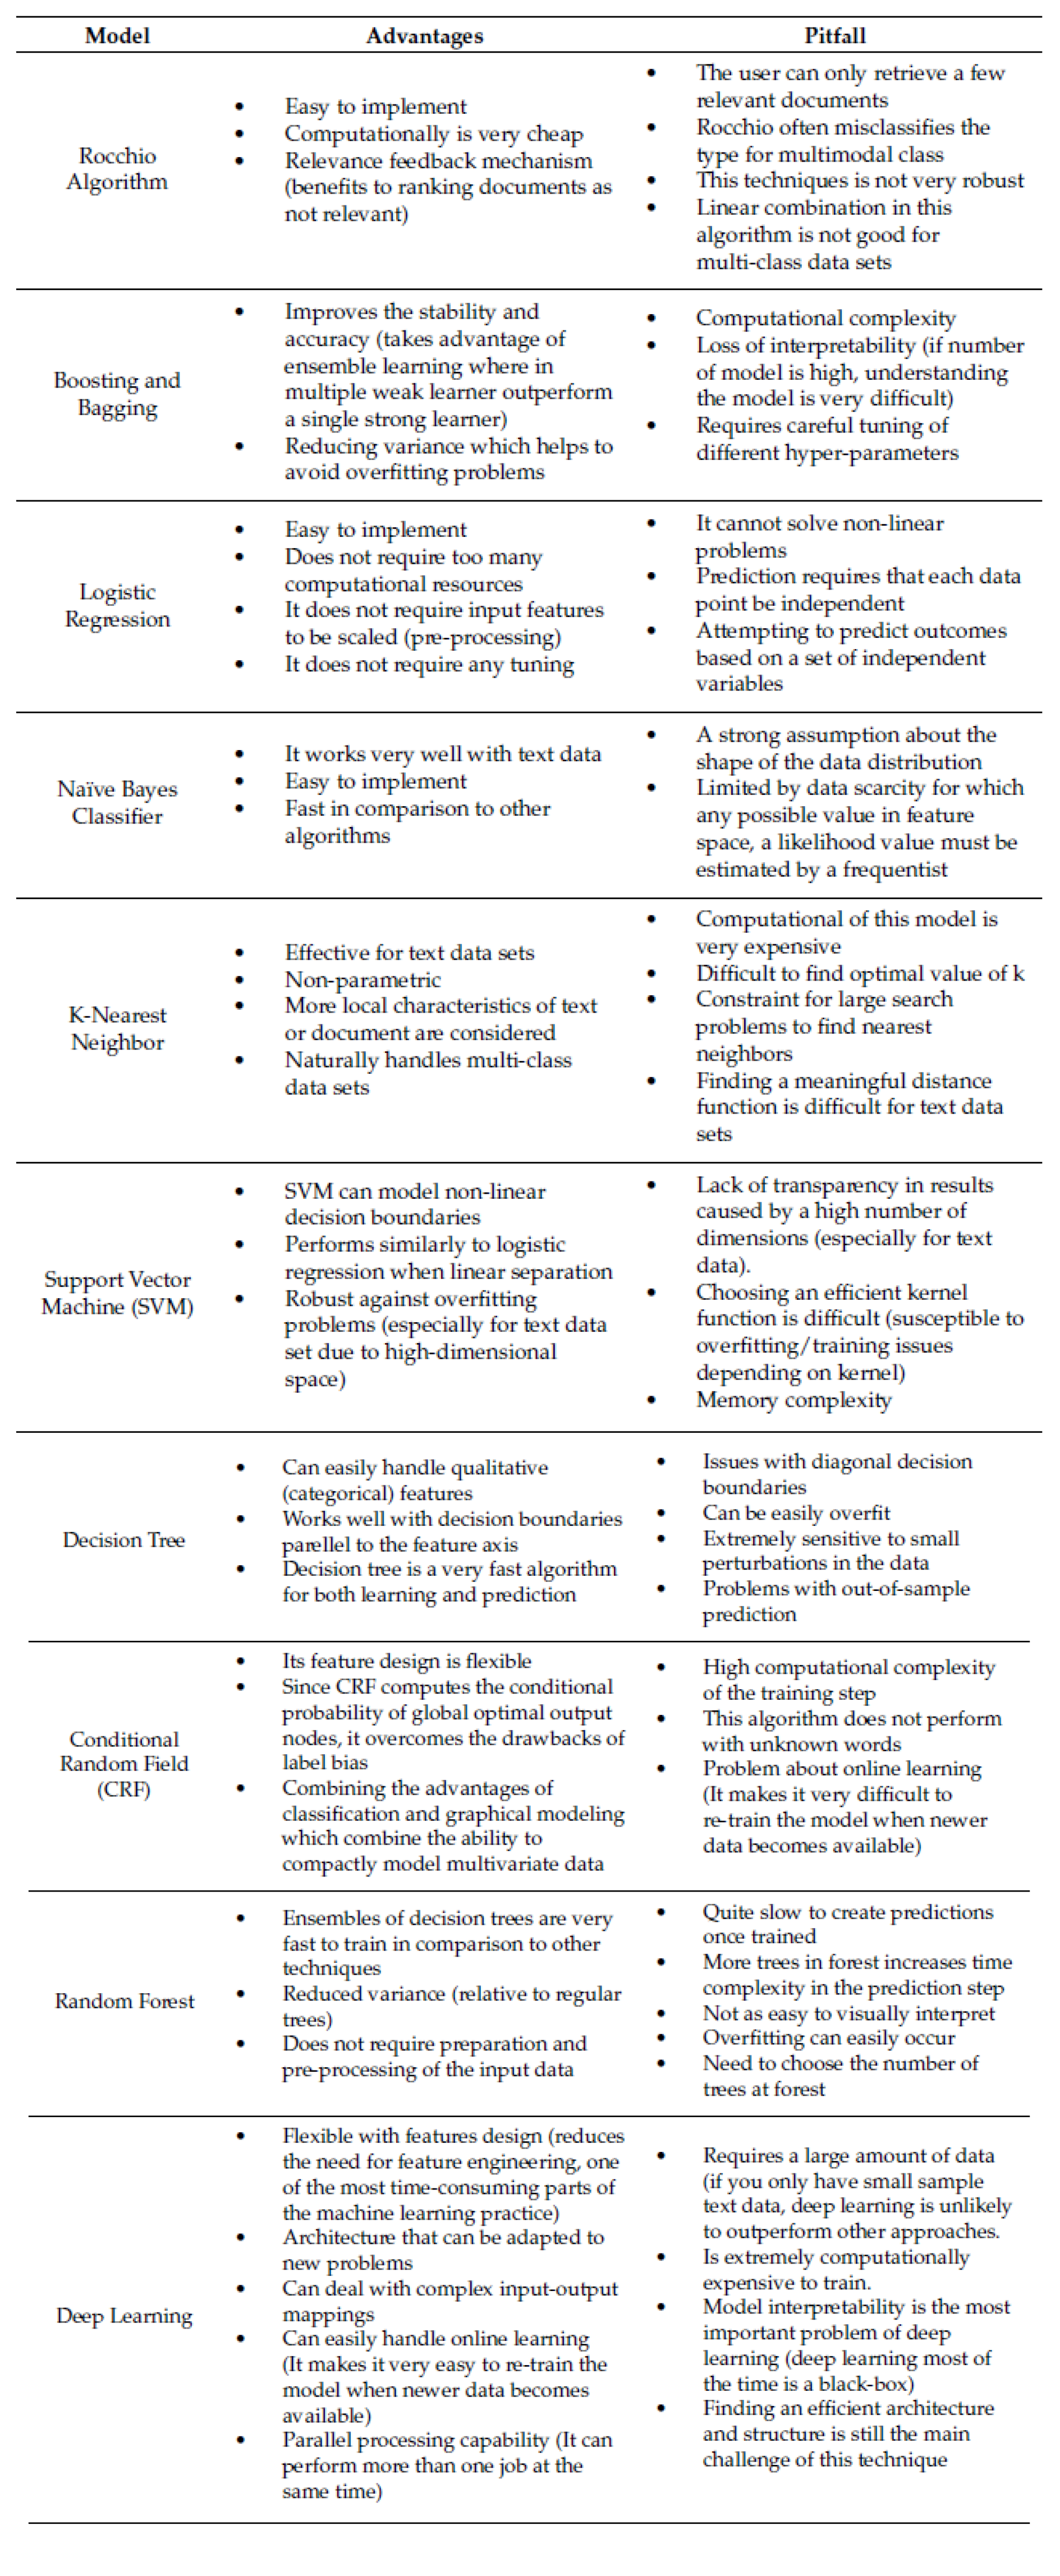 -->

<div>
    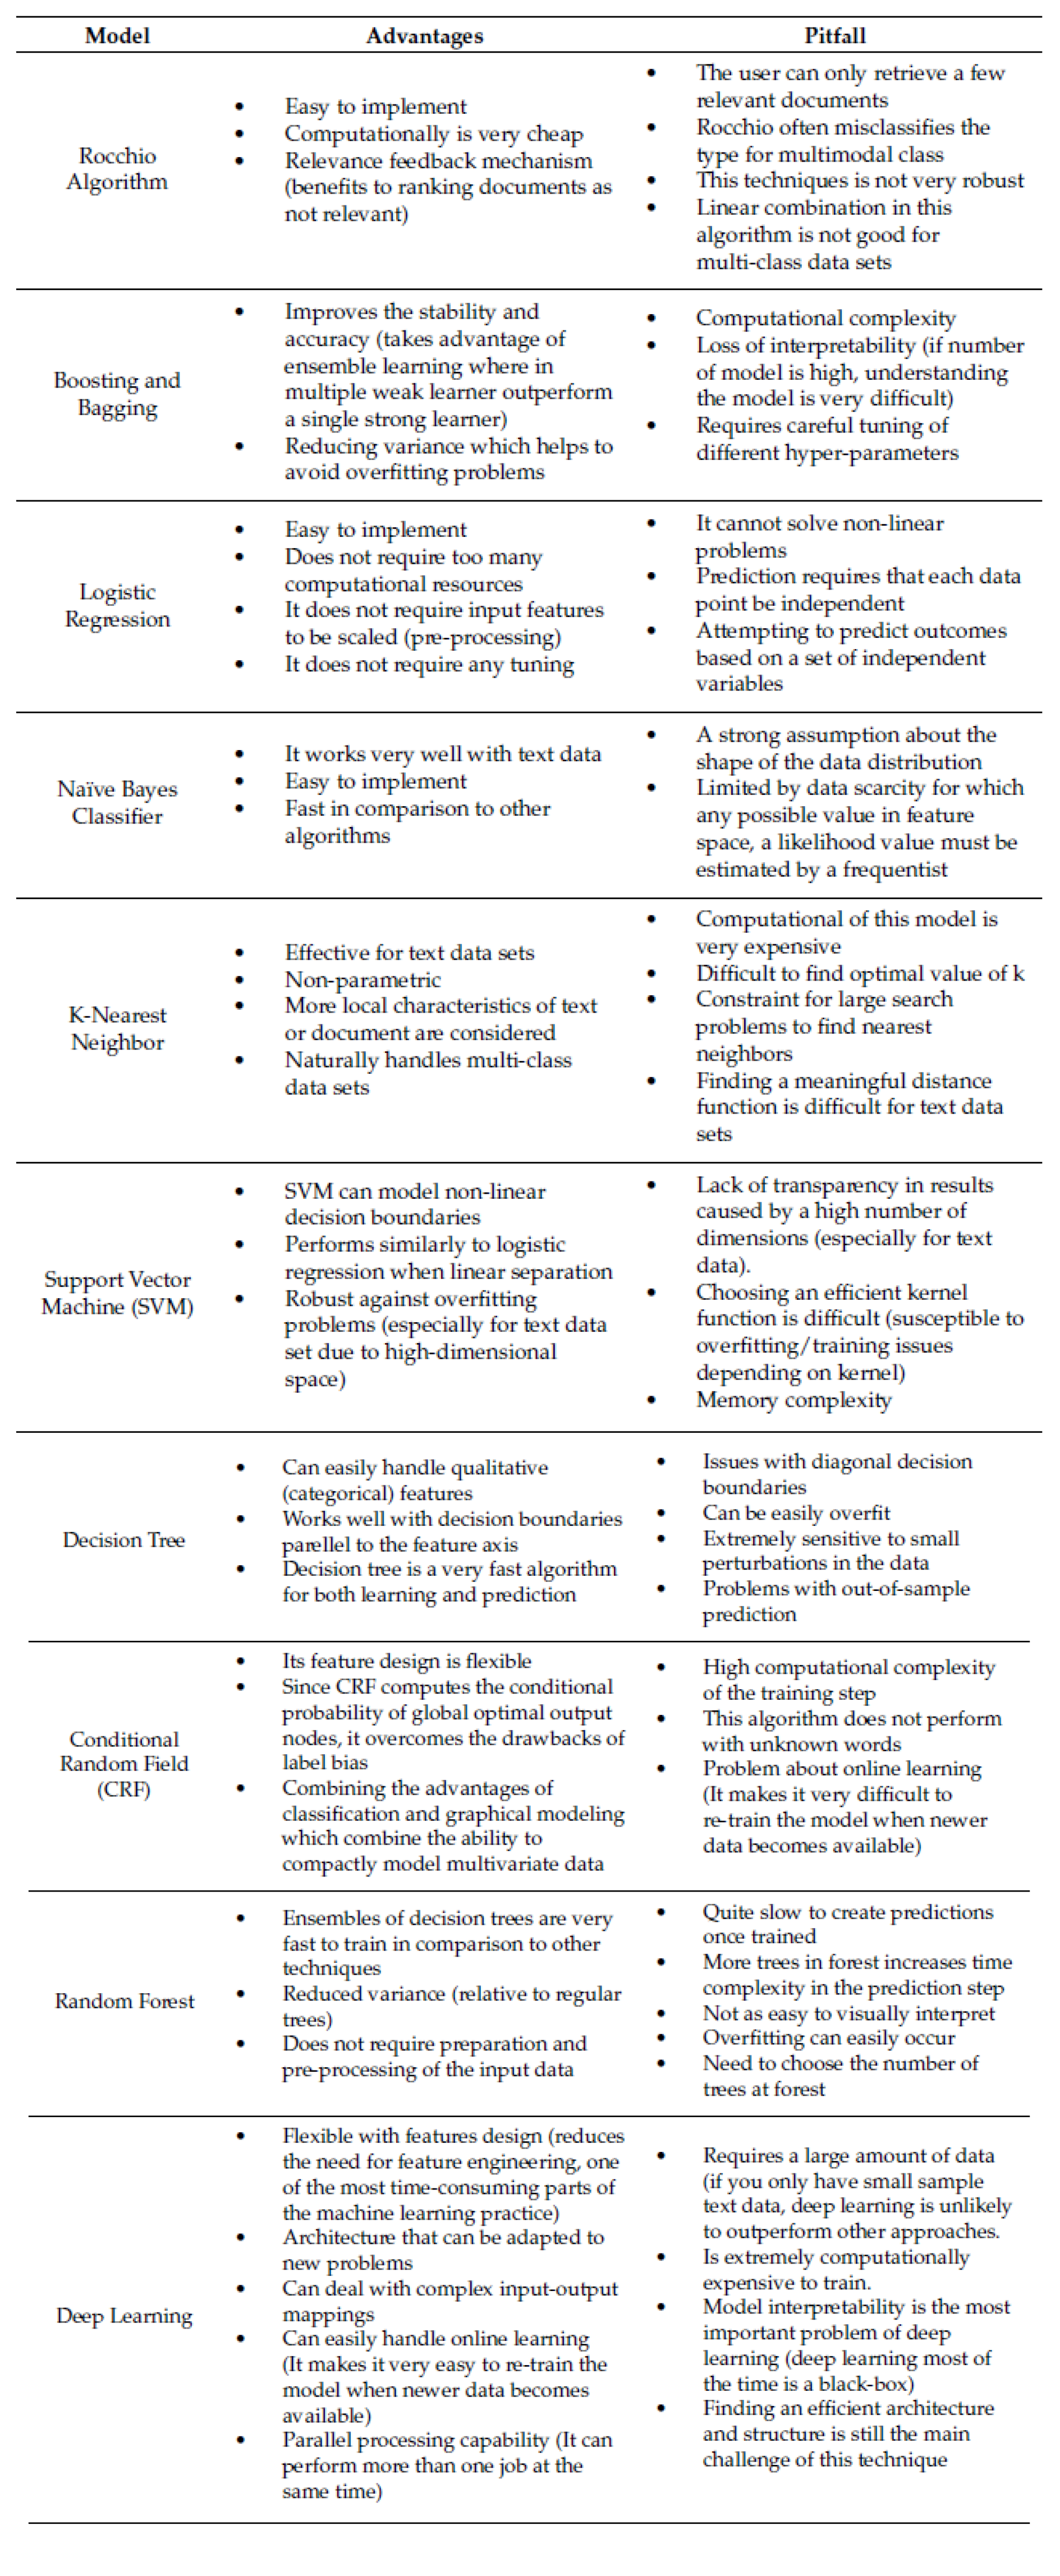
</div>

After these theoretical consideration, let's skip to practical part of work.

Used dataset comprised of texts/excerpts of three authors. Simply put, we have three classes which means we have <b>multi-class classification</b> problem.

Classes in our dataset: 
<ul>
    <li>EAP</li>
    <li>HPL</li>
    <li>MWS </li>
</ul>    

Before dive deeper in development, we have to choose some metrics (this assignment requires one metric being choose).

We have cited some metrics commonly used for classification problem. To perform evaluation process I will use one main metrics:

<b><ul>
    <li>F1-Score</li>
</ul>
</b>    

As I will use <b>sklearn.metrics module</b> that implements several loss, score, and utility functions to measure classification performance, additional metrics (<b>Precision</b> and <b>Recall</b>) will be used automatically using <b>classification_report</b> [<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report">CLASSIFICATION METRICS</a>].

Also, I would propose usage of Confusion Matrix to give more intuitive explanation.

><h3>NOTE!</h3>
Multi-Class Log Loss should be considered to use in real-world application.

<h3>Practical Work</h3>

In [1]:
# Importing libs
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import string, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report

In [2]:
# Importing dataset
file = '/StackPath Assignment/authors.csv'
df = pd.read_csv(file) 

<h3>Data Preprocessing</h3>

Now we will perform some steps to prepare our dataset for our ML model.

<style type="text/css">
 ul {
  list-style-type: none;
 }
</style>

<ul>
    <li><b>Encode the Labels</b></li>
    <li><b>Text Processing</b></li>
    <ul>
        <li>Removal of Puntuation</li>
        <li>Lowercase conversion</li> 
        <li>Removal of Stopwords</li>
        <li>Stemming</li>            
    </ul>
    <li><b>Training/Test Dataset Splitting</b></li>
    <li><b>Feature Engineering</b></li>
</ul>

From EDA analysis we can see very high frequency of some words, such as 'one','could','would', which are not listed in stop words. We can see presence of 'couldn't', 'wouldn't' in stop words list. Hence we will update this list with three listed words.

In [3]:
stop_words=set(stopwords.words("english"))
# Updating stopwords corpus
stop_words.update(('one','could','would'))

In [4]:
# Label encoding of classes

y = df['author']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# 0 - EAP
# 1 - HPL
# 2 - MWS

# Input data
X = df['text']

In [5]:
# Text Processing

def text_processing(df):
    stem = PorterStemmer()
    word_list = []
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', df)
    # Lowercase conversion
    text = text.lower() 
    # Tokenization
    tokenized_word = word_tokenize(text)
    
    # Removal of Stopwords and Stemming
    for word in tokenized_word:
        if word not in stop_words: 
            word = stem.stem(word)
            word_list.append(word)
            
    return ' '.join(word_list)

In [6]:
# Dataset Splitting

# 80% - Training 
# 20% - Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Splitted dataset size printing
print ("Training set size: ", X_train.shape[0])
print ("Test set size: ", X_test.shape[0])

Training set size:  15663
Test set size:  3916


In [7]:
# Feature Extraction Using Bag-of-Words transformer

# Based on empirical experience CountVectorizer has shown to be better option than TF-IDF

bow_transformer = CountVectorizer(analyzer=text_processing).fit(X_train)
X_train_bow = bow_transformer.transform(X_train)
X_test_bow = bow_transformer.transform(X_test)

Given the fact that Naive-Bayes (NB) Classifier and Logistic Regression (LR) are two commonly used classifiers for NLP tasksand I will use them for this assignment.

In [8]:
# Models

# For metrics evaluation I will use afforementioned metrics given by 'classification_report'
# F1–Score, Precision, and Recall
# Accuracy would be pointless metrics in our case because of imbalanced dataset

# First Classifier
LR = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)
LR_Model = LR.fit(X_train_bow, y_train)

#Second Classifier
NB = MultinomialNB(alpha = 1.3)
NB_Model = NB.fit(X_train_bow, y_train)

In [9]:
LR_predictions = LR_Model.predict(X_test_bow)

NB_predictions = NB_Model.predict(X_test_bow)


In [10]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.47      0.70      0.56      1562
           1       0.51      0.35      0.41      1149
           2       0.45      0.28      0.35      1205

    accuracy                           0.47      3916
   macro avg       0.47      0.45      0.44      3916
weighted avg       0.47      0.47      0.45      3916



In [11]:
print(classification_report(y_test, NB_predictions))

              precision    recall  f1-score   support

           0       0.48      0.63      0.54      1562
           1       0.46      0.43      0.44      1149
           2       0.45      0.29      0.36      1205

    accuracy                           0.47      3916
   macro avg       0.46      0.45      0.45      3916
weighted avg       0.46      0.47      0.46      3916

